In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [20]:
array_a = np.random.randint(1, 100, 20)
print(array_a)

[64 50 79 59 81  4 65 86 32 81  6 84 19 32 34 46 28 52 11 97]


In [21]:
# reshape_array is reshape_a
reshape_a = array_a.reshape(5, 4)
print(reshape_a)

[[64 50 79 59]
 [81  4 65 86]
 [32 81  6 84]
 [19 32 34 46]
 [28 52 11 97]]


In [22]:
first_five_elements = reshape_a[0,:5]
print(first_five_elements)

[64 50 79 59]


In [23]:
array_b = np.random.randint(1, 100, 20)
reshape_b = array_b.reshape(5, 4)
added_arrays = reshape_a + reshape_b
print(added_arrays)

[[ 90  59 141  78]
 [ 91  90 162 158]
 [125 110  59 169]
 [115  69  36  58]
 [ 31  65  85 134]]


In [24]:
matrix_a = np.random.randint(1, 100, 9).reshape(3, 3)
matrix_b = np.random.randint(1, 100, 9).reshape(3, 3)
matrix_product = np.dot(matrix_a, matrix_b)
print(matrix_product)

[[6615 6240 7703]
 [1879 1994 6531]
 [5782 5669 6880]]


In [25]:
array_c = np.random.randint(1, 100, 4)
broadcasted_array = reshape_a + array_c
print(broadcasted_array)


[[156  85  91 138]
 [173  39  77 165]
 [124 116  18 163]
 [111  67  46 125]
 [120  87  23 176]]


In [26]:
sliced_array = reshape_a[::3, ::2]
print(sliced_array)

[[64 79]
 [19 34]]


In [27]:
stats = {
    "sum" : np.sum(reshape_a),
    "mean" : np.mean(reshape_a),
    "std" : np.std(reshape_a)
}
print(stats)

{'sum': 1010, 'mean': 50.5, 'std': 28.162918882814687}


In [28]:
max_index = np.argmax(reshape_a)
min_index = np.argmin(reshape_a)
max_coords = np.unravel_index(max_index, reshape_a.shape)
min_coords = np.unravel_index(min_index, reshape_a.shape)

print(reshape_a[max_coords],reshape_a[min_coords])

97 4


In [29]:
array_d = np.random.rand(10)
print(array_d)
modified_array = array_d.copy()
if np.any(modified_array >= 0.5):
    modified_array[modified_array >= 0.5] = 1
if np.any(modified_array < 0.5):
    modified_array[modified_array < 0.5] = 0.
print(modified_array)    

[0.38993451 0.24380372 0.33580325 0.55554065 0.9868702  0.72643641
 0.9641067  0.34591977 0.94290562 0.73915095]
[0. 0. 0. 1. 1. 1. 1. 0. 1. 1.]


In [30]:
df_a = pd.DataFrame(reshape_a,columns=['A','B','C','D'])
print(df_a)

    A   B   C   D
0  64  50  79  59
1  81   4  65  86
2  32  81   6  84
3  19  32  34  46
4  28  52  11  97


In [31]:
new_row = np.random.randint(1, 50, 4) 
df_a.loc[len(df_a)] = new_row
print(df_a)  

    A   B   C   D
0  64  50  79  59
1  81   4  65  86
2  32  81   6  84
3  19  32  34  46
4  28  52  11  97
5  27  44  17  15


In [32]:
m,n =  df_a.shape
sum = df_a.sum(axis=1)
df_a.loc[:,n] = sum
print(df_a)

    A   B   C   D    4
0  64  50  79  59  252
1  81   4  65  86  236
2  32  81   6  84  203
3  19  32  34  46  131
4  28  52  11  97  188
5  27  44  17  15  103


In [33]:
col_c = df_a['C']
print(col_c)

0    79
1    65
2     6
3    34
4    11
5    17
Name: C, dtype: int32


In [34]:
filtered_df = df_a[df_a['A'] > 30]
print(filtered_df)

    A   B   C   D    4
0  64  50  79  59  252
1  81   4  65  86  236
2  32  81   6  84  203


In [36]:
mean_values = df_a.mean(axis=1)
std_values = df_a.std(axis=1)
print(mean_values)
print(std_values)


0    100.8
1     94.4
2     81.2
3     52.4
4     75.2
5     41.2
dtype: float64
0    85.174527
1    85.640528
2    75.694782
3    44.969990
4    70.863954
5    36.403297
dtype: float64


In [37]:
df_a.iloc[2, 1] = np.nan
df_a.iloc[4, 3] = np.nan
df_a.fillna(df_a.mean(), inplace=True)  

print(df_a)

    A     B   C     D    4
0  64  50.0  79  59.0  252
1  81   4.0  65  86.0  236
2  32  36.4   6  84.0  203
3  19  32.0  34  46.0  131
4  28  52.0  11  58.0  188
5  27  44.0  17  15.0  103


In [38]:
df_a_sorted = df_a.sort_values(by='A', ascending=False)
print(df_a_sorted)

    A     B   C     D    4
1  81   4.0  65  86.0  236
0  64  50.0  79  59.0  252
2  32  36.4   6  84.0  203
4  28  52.0  11  58.0  188
5  27  44.0  17  15.0  103
3  19  32.0  34  46.0  131


In [39]:
grouped_df = df_a.groupby('A').sum()
print(grouped_df)

       B   C     D    4
A                      
19  32.0  34  46.0  131
27  44.0  17  15.0  103
28  52.0  11  58.0  188
32  36.4   6  84.0  203
64  50.0  79  59.0  252
81   4.0  65  86.0  236


In [40]:
# Task 10: Merging DataFrames
# Create another DataFrame `df_b` and merge it with `df_a` on column 'A', using an inner join.
# Expected output format: merged_df should be a DataFrame containing rows where 'A' exists in both.
df_b = pd.DataFrame(np.random.randint(1, 50, 4).reshape(1, 4), columns=['A', 'B', 'C', 'D'])
merged_df = pd.merge(df_a, df_b, on='A', how='inner')       
print(merged_df)

Empty DataFrame
Columns: [A, B_x, C_x, D_x, 4, B_y, C_y, D_y]
Index: []


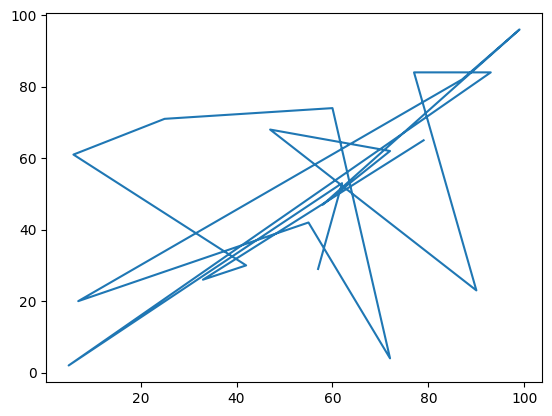

In [41]:
# Task 1: Basic Plot
# Create a simple line plot using `array_a` as the x-values and `added_arrays` as the y-values.
array_a1 = np.random.randint(1, 100, 20)
array_a2 = np.random.randint(1, 100, 20)    
plt.plot(array_a1, array_a2)
plt.show()

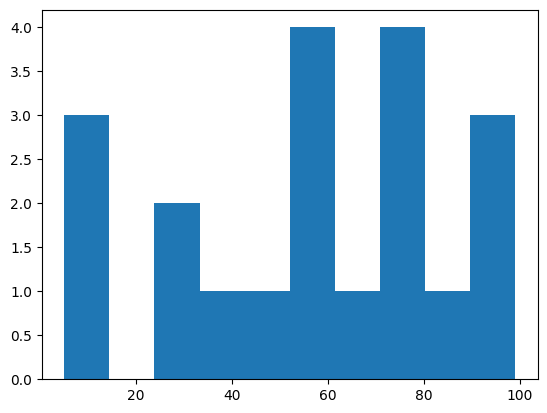

In [42]:
plt.hist(array_a1, bins=10)
plt.show()

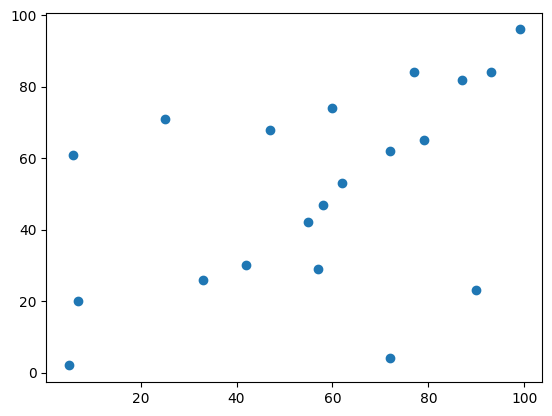

In [43]:
plt.scatter(array_a1, array_a2) 
plt.show()

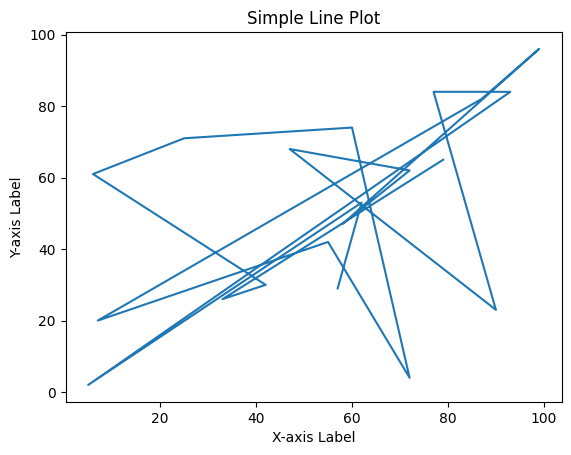

In [44]:
plt.plot(array_a1, array_a2)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title ("Simple Line Plot")
plt.show()